<a href="https://colab.research.google.com/github/HarmanDotpy/ML-Assignment2/blob/main/Q1__SVM_on_PCA_HEALTH_data_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate


### Make data

In [2]:
numcat = 2
categories = ['healthy', 'disease']

In [4]:
df_h = pd.read_csv('/content/health_data.csv')
print(df_h.head())

train_per = 0.7 #train test split
#randomize indces, take the first 80% of the indeces and last 20 percent as test
indices = np.random.permutation(df_h.shape[0])
train_ind, test_ind = indices[:int(train_per*df_h.shape[0])], indices[int(train_per*df_h.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df_h.loc[train_ind, :], df_h.loc[test_ind, :]
train_df, test_df = train_df.reset_index(drop = True), test_df.reset_index(drop = True)
# train_df.drop('index')

# Data in numpy arrays (also separating train data by classes)
X_train = train_df.drop('category', axis = 1).to_numpy()
y_train = train_df.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X_train.shape[0],))

# X_train_0, X_train_1 = train_df.loc[train_df['category'] == 0].drop('category', axis = 1).to_numpy(),train_df.loc[train_df['category'] == 1].drop('category', axis = 1).to_numpy()
X_test, y_test = test_df.drop('category', axis = 1).to_numpy(), test_df['category'].to_numpy().reshape((-1, ))
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0
(211, 3) (211,) (489, 3) (489,)


### PCA to reduce to 2 dimensions

In [5]:
indices = np.random.permutation(df_h.shape[0])
df_h = df_h.loc[indices]
X = df_h.drop('category', axis = 1).to_numpy()
#Normalize
X = (X-X.mean(axis = 0))/X.var(axis = 0)
y = df_h.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X.shape[0],))
print(X)

[[-0.07912828 -0.07005826 -0.01787644]
 [ 0.00105109 -0.02820439 -0.01062739]
 [ 0.11896193  0.09137811  0.03912745]
 ...
 [-0.01309821 -0.05212089  0.00485922]
 [-0.06026254 -0.09995389 -0.02479599]
 [ 0.01048396 -0.0192357   0.01408528]]


In [6]:
def scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categories[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [7]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.03558921813964844 seconds


In [8]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.8949819  0.08167195]


Number of unique classes are = 2


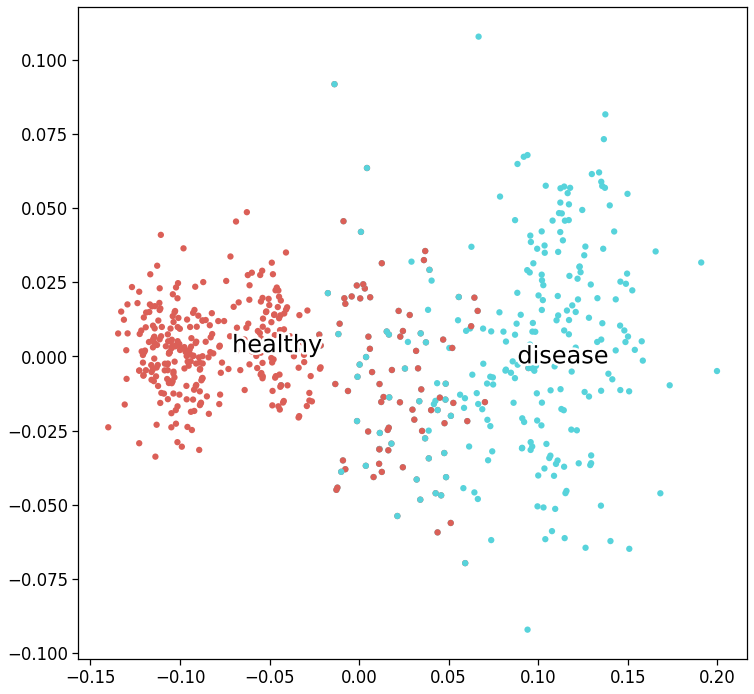

In [9]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fig, _,_,_ = scatter(top_two_comp.values,y) # Visualizing the PCA output

In [10]:
import matplotlib.pyplot as plt

In [11]:
X_pca = top_two_comp.values
#randomize indices


In [12]:
##Now we have pca output data Xpca and y is same as before

In [13]:
X_train = X_pca[0:int(0.7*X_pca.shape[0])]
y_train = y[0:int(0.7*X_pca.shape[0])]
X_test = X_pca[int(0.7*X_pca.shape[0]):]
y_test = y[int(0.7*X_pca.shape[0]):]

In [14]:
print(X_train.shape)
print(y_train.shape)

(489, 2)
(489,)


### RBF Kernel

In [15]:
#Training
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#testing
y_pred_test = clf.predict(X_test)
print(y_pred_test)

[0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1]


In [17]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9388    0.7541    0.8364       122
           1     0.7345    0.9326    0.8218        89

    accuracy                         0.8294       211
   macro avg     0.8366    0.8433    0.8291       211
weighted avg     0.8526    0.8294    0.8302       211



### Grid search over C and gamma
for each C plotting error formultiple gammas

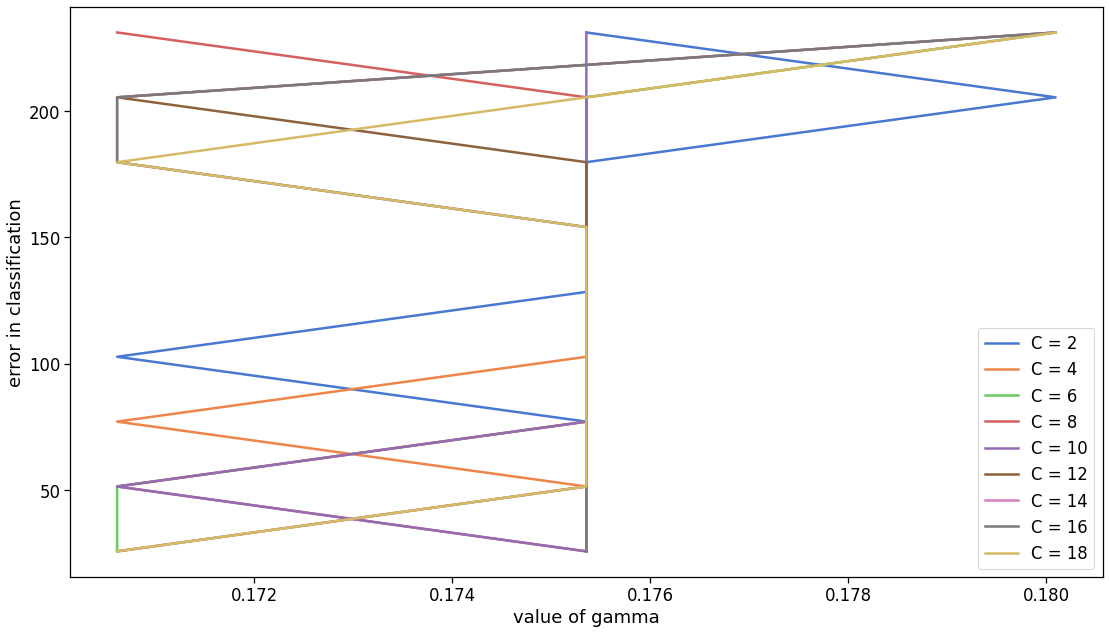

In [18]:
rangeC = [2*i for i in range(1, 10)]
range_g = [i/5 for i in range(1, 10)]*1/(X_train.shape[1]*X_train.var())# the multiplied value is the default value of gamma
# errors = []
bestC = 0
bestgamma = 0
besterror = 0
maxerror = 0 
minerror = 100
for C in rangeC:
    errors = []
    for gamma in range_g:

        #Training
        clf = svm.SVC(kernel='rbf', C = C, gamma = gamma)
        clf.fit(X_train, y_train)
        
        #testing
        y_pred_test = clf.predict(X_test)
        error = 1-(y_pred_test==y_test).mean()
        errors.append(error)
#         errors.append(error)
        if(besterror<=error):
            besterror = error
            bestC=C
            bestgamma = gamma
        if(error>maxerror):
            maxerror = error
        if(error<minerror):
            minerror = error
#         print(error)
    plt.plot(errors, range_g, label = 'C = {}'.format(np.around(C)))
            
# plt.ylim(minerror, maxerror)

plt.xlabel('value of gamma')
plt.ylabel('error in classification')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [19]:
CRBF, gammaRBF = bestC, bestgamma
print(CRBF, gammaRBF)

18 231.1396946119429


### Linear Kernel

In [20]:
#Training
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
#testing
y_pred_test = clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.9018    0.8279    0.8632       122
           1     0.7879    0.8764    0.8298        89

    accuracy                         0.8483       211
   macro avg     0.8448    0.8521    0.8465       211
weighted avg     0.8537    0.8483    0.8491       211



### Cross Validation
To find optimal value of C 

In [23]:
error = []
rangeC = [i/10 for i in range(1,200)]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='linear', C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())
#     if

[0.4314958973280033, 0.4029034294130023, 0.17380601725226175, 0.14111087734062688, 0.13702924468756572, 0.13700820534399338, 0.14313065432358518, 0.13496738901746264, 0.13700820534399338, 0.13700820534399338, 0.13496738901746264, 0.13496738901746264, 0.132926572690932, 0.1349463496738903, 0.13496738901746264, 0.1390490216705238, 0.14108983799705455, 0.14108983799705455, 0.13700820534399338, 0.14108983799705455, 0.1390490216705238, 0.14108983799705455, 0.14108983799705455, 0.13700820534399338, 0.1390490216705238, 0.13700820534399338, 0.1390490216705238, 0.13700820534399338, 0.13700820534399338, 0.1390490216705238, 0.1390490216705238, 0.13700820534399338, 0.14108983799705455, 0.14108983799705455, 0.13700820534399338, 0.13700820534399338, 0.13700820534399338, 0.13700820534399338, 0.13700820534399338, 0.13700820534399338, 0.13700820534399338, 0.1390490216705238, 0.1390490216705238, 0.1390490216705238, 0.1390490216705238, 0.13700820534399338, 0.1390490216705238, 0.14108983799705455, 0.14108

Text(0, 0.5, 'error in classification')

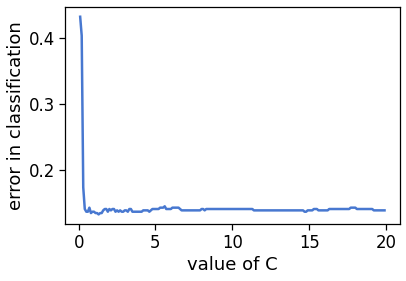

In [24]:
print(error)
plt.plot(rangeC, error)
plt.xlabel('value of C')
plt.ylabel('error in classification')

### Polynomial Kernel

### Degree 2

In [60]:
#Training
clf = svm.SVC(kernel='poly', degree = 2, C = 10)
clf.fit(X_train, y_train)

#testing
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(y_test, y_pred_test, digits = 4))
print(classification_report(y_train, y_pred_train, digits = 4))

### Cross Validation
To find optimal value of C 

In [28]:
error = []
rangeC = [i/10 for i in range(1,200)]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 2, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.3925731117189144, 0.3803282137597307, 0.38034925310330325, 0.3803282137597306, 0.37828739743320006, 0.38034925310330314, 0.3844308857563644, 0.3823479907426889, 0.38642962339575004, 0.37212286976646325, 0.3700820534399327, 0.37418472543656645, 0.3700820534399327, 0.3700820534399327, 0.3700820534399327, 0.36600042078687145, 0.36600042078687145, 0.3619187881338102, 0.35987797180727965, 0.35987797180727965, 0.3557963391542185, 0.3557963391542185, 0.357837155480749, 0.35781611613717657, 0.3537344834841154, 0.3537344834841154, 0.35169366715758477, 0.35169366715758477, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.35169366715758477, 0.35169366715758477, 0.35577529981064593, 0.35577529981064593, 0.35577529981064593, 0.35577529981064593, 0.35577529981064593, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 0.3537344834841153, 

Text(0, 0.5, 'error in classification')

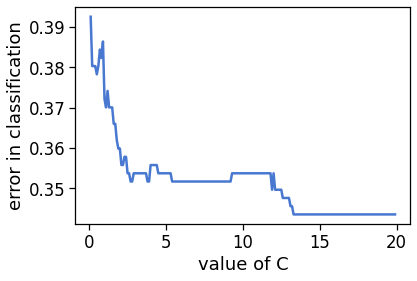

In [29]:
print(error)
plt.plot(rangeC, error)
plt.xlabel('value of C')
plt.ylabel('error in classification')

### Degree 3

In [30]:
#Training
clf = svm.SVC(kernel='poly', degree = 3, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
#testing
y_pred_test = clf.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8409    0.9098    0.8740       122
           1     0.8608    0.7640    0.8095        89

    accuracy                         0.8483       211
   macro avg     0.8508    0.8369    0.8418       211
weighted avg     0.8493    0.8483    0.8468       211



### Cross Validation
To find optimal value of C 

In [33]:
error = []
rangeC = [i/10 for i in range(1,200)]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 3, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.179949505575426, 0.16156111929307804, 0.16156111929307804, 0.15747948664001687, 0.1595203029665475, 0.16156111929307804, 0.16156111929307804, 0.1595203029665475, 0.15747948664001687, 0.15543867031348613, 0.15337681464338304, 0.1554176309699138, 0.1554176309699138, 0.1554176309699138, 0.1554176309699138, 0.1554176309699138, 0.1554176309699138, 0.15745844729644443, 0.15745844729644443, 0.15745844729644443, 0.15745844729644443, 0.15745844729644443, 0.15745844729644443, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0.15949926362297495, 0

Text(0, 0.5, 'error in classification')

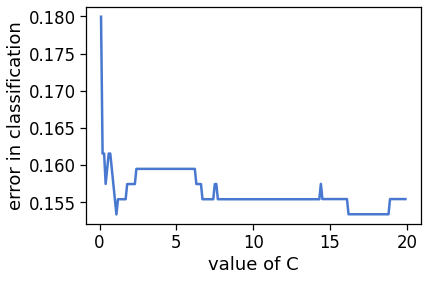

In [34]:
print(error)
plt.plot(rangeC, error)

plt.xlabel('value of C')
plt.ylabel('error in classification')

### Degree 4

In [35]:
#Training
clf = svm.SVC(kernel='poly', degree = 4, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
#testing
y_pred_test = clf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6667    0.9508    0.7838       122
           1     0.8378    0.3483    0.4921        89

    accuracy                         0.6967       211
   macro avg     0.7523    0.6496    0.6379       211
weighted avg     0.7389    0.6967    0.6607       211



### Cross Validation
To find optimal value of C 

In [38]:
error = []
rangeC = [i/10 for i in range(1,200)]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 4, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.3537765621712603, 0.3414895855249317, 0.3353671365453399, 0.3333473595623817, 0.33538817588891223, 0.33130654323585096, 0.32926572690932043, 0.32926572690932043, 0.32926572690932043, 0.32926572690932043, 0.32926572690932043, 0.3272249105827898, 0.3272249105827898, 0.3272249105827898, 0.3272249105827898, 0.3272249105827898, 0.32518409425625916, 0.32518409425625916, 0.32518409425625916, 0.32518409425625916, 0.3231222385861561, 0.3231222385861561, 0.3231222385861561, 0.3231222385861561, 0.3231222385861561, 0.3231011992425836, 0.3231011992425836, 0.3251630549126867, 0.3251630549126867, 0.3251630549126867, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387123921735, 0.32720387

Text(0, 0.5, 'error in classification')

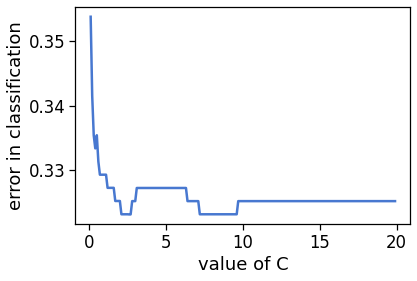

In [39]:
print(error)
plt.plot(rangeC, error)

plt.xlabel('value of C')
plt.ylabel('error in classification')

# Decision boundaries

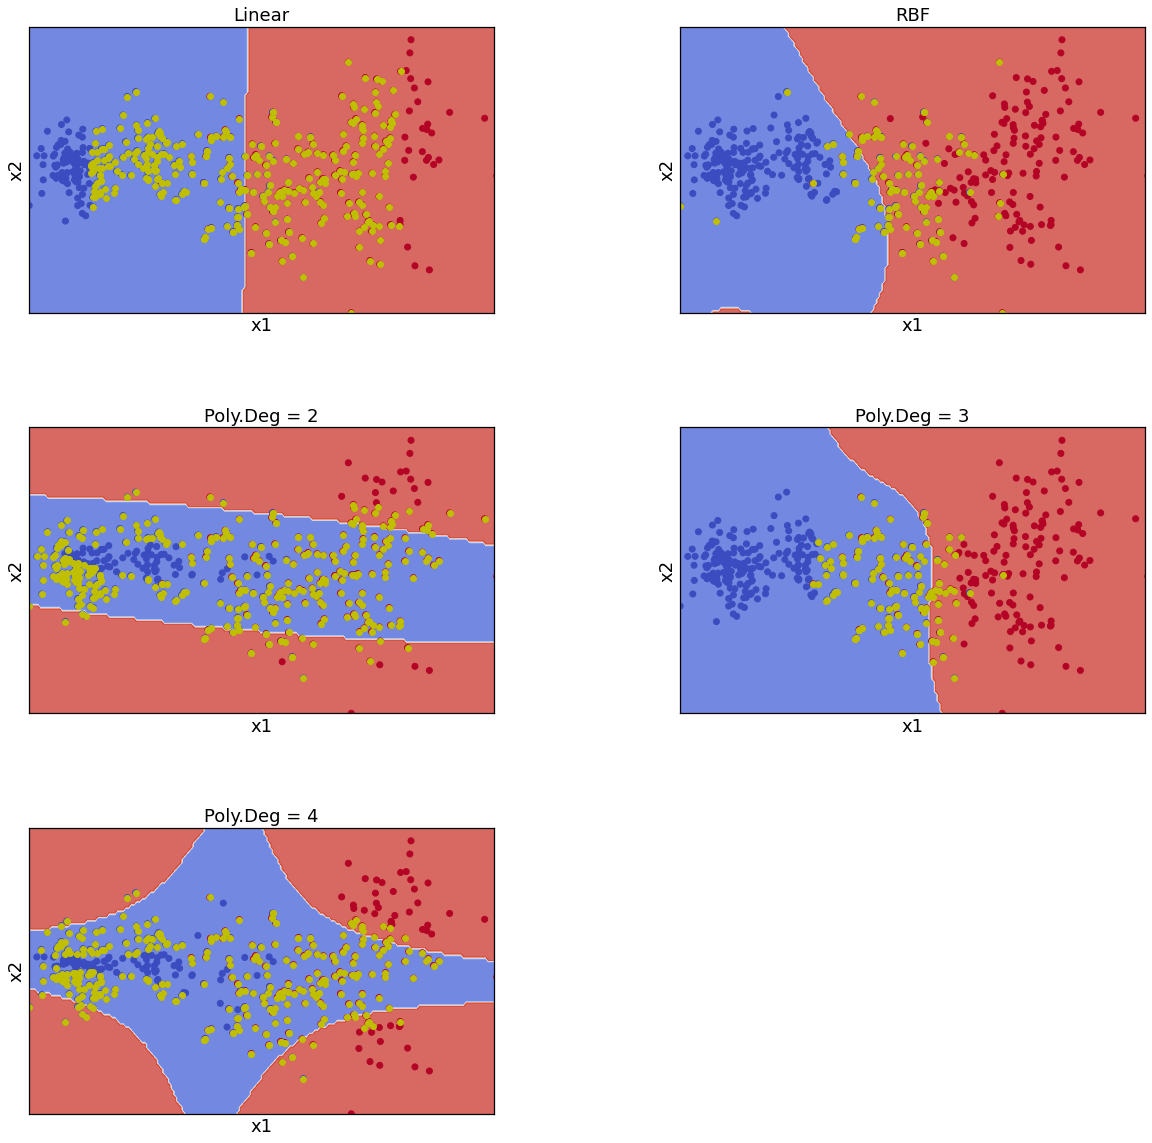

In [58]:
# approach - we make a grid and classify all points
# step size in the grid
h = .002

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', C=18, gamma = 149).fit(X_train, y_train)
poly2_svc = svm.SVC(kernel='poly', degree=2, C=2).fit(X_train, y_train)
poly3_svc = svm.SVC(kernel='poly', degree=3, C=7).fit(X_train, y_train)
poly4_svc = svm.SVC(kernel='poly', degree=4, C=7).fit(X_train, y_train)


# create a mesh to plot in
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear',
          'RBF',
          'Poly.Deg = 2',
          'Poly.Deg = 3',
          'Poly.Deg = 4'
         ]


for i, clf in enumerate((svc, rbf_svc, poly2_svc, poly3_svc, poly4_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    X_sv = clf.support_vectors_
    plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.show()

# Decision boundaries -  Without support vectors

294 489 195


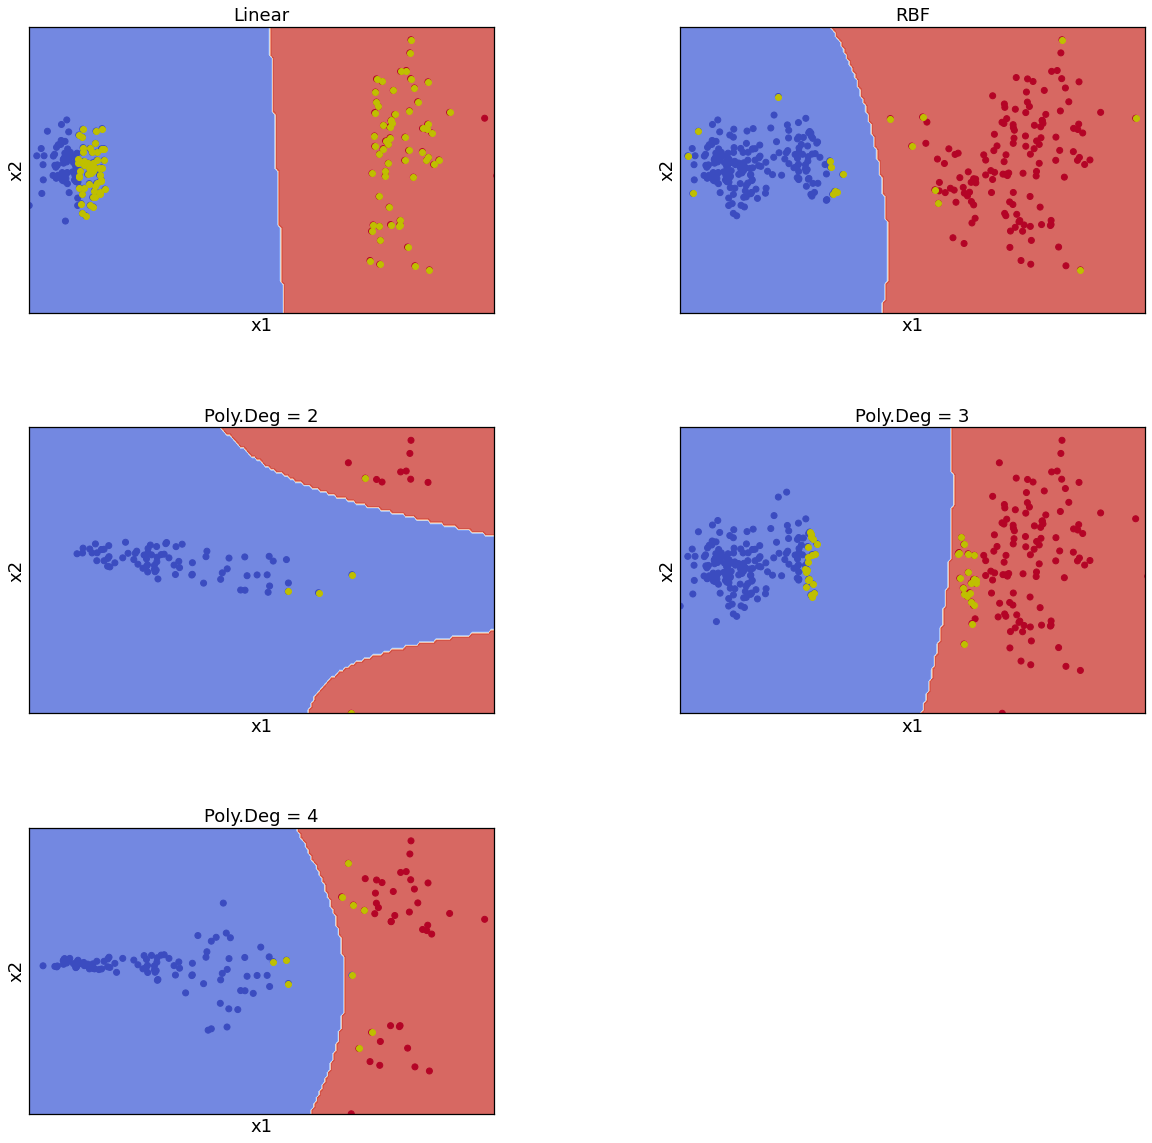

In [59]:
# approach - we make a grid and classify all points
# step size in the grid
h = .002

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
supind = svc.support_ 
X_new = np.delete(X_train, supind, axis = 0)
y_new = np.delete(y_train, supind, axis = 0)
print(supind.shape[0], X_train.shape[0], X_new.shape[0])
# svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=0.5).fit(X_new, y_new)
plt.subplot(3, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.coolwarm)
X_sv = svc.support_vectors_
plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Linear')

############################################
svc = svm.SVC(kernel='rbf', C=18, gamma = 149).fit(X_train, y_train)
supind = svc.support_ 
X_new = np.delete(X_train, supind, axis = 0)
y_new = np.delete(y_train, supind, axis = 0)
svc = svm.SVC(kernel='rbf', C=0.5).fit(X_new, y_new)
plt.subplot(3, 2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.coolwarm)
X_sv = svc.support_vectors_
plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('RBF')

############################################
svc = svm.SVC(kernel='poly', degree=2, C=0.5).fit(X_train, y_train)
supind = svc.support_ 
X_new = np.delete(X_train, supind, axis = 0)
y_new = np.delete(y_train, supind, axis = 0)
# svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
svc = svm.SVC(kernel='poly', C=0.5).fit(X_new, y_new)
plt.subplot(3, 2, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.coolwarm)
X_sv = svc.support_vectors_
plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Poly.Deg = 2')

############################################
svc = svm.SVC(kernel='poly', degree=3, C=7).fit(X_train, y_train)
supind = svc.support_ 
X_new = np.delete(X_train, supind, axis = 0)
y_new = np.delete(y_train, supind, axis = 0)
# svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
svc = svm.SVC(kernel='poly', C=0.5).fit(X_new, y_new)
plt.subplot(3, 2, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.coolwarm)
X_sv = svc.support_vectors_
plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Poly.Deg = 3')

############################################
svc = svm.SVC(kernel='poly', degree=4, C=1).fit(X_train, y_train)
supind = svc.support_ 
X_new = np.delete(X_train, supind, axis = 0)
y_new = np.delete(y_train, supind, axis = 0)
# svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
svc = svm.SVC(kernel='poly', C=0.5).fit(X_new, y_new)
plt.subplot(3, 2, 5)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.coolwarm)
X_sv = svc.support_vectors_
plt.scatter(X_sv[:, 0], X_sv[:, 1], c='y', cmap=plt.cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Poly.Deg = 4')



fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.show()

Final Test and Train accuracies

In [64]:
# approach - we make a grid and classify all points
# step size in the grid
h = .002

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', C=18, gamma = 149).fit(X_train, y_train)
poly2_svc = svm.SVC(kernel='poly', degree=2, C=2).fit(X_train, y_train)
poly3_svc = svm.SVC(kernel='poly', degree=3, C=7).fit(X_train, y_train)
poly4_svc = svm.SVC(kernel='poly', degree=4, C=7).fit(X_train, y_train)


# create a mesh to plot in
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear',
          'RBF',
          'Poly.Deg = 2',
          'Poly.Deg = 3',
          'Poly.Deg = 4'
         ]


for i, clf in enumerate((svc, rbf_svc, poly2_svc, poly3_svc, poly4_svc)):
  print(titles[i]+'-'*100)
  #testing
  y_pred_test = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  print(classification_report(y_test, y_pred_test, digits = 4))
  print(classification_report(y_train, y_pred_train, digits = 4))




# for i in range()
#   #Training
#   clf = svm.SVC(kernel='linear', C = 0.5)
#   clf.fit(X_train, y_train)

#   #testing
#   y_pred_test = clf.predict(X_test)
#   y_pred_train = clf.predict(X_train)
#   print(classification_report(y_test, y_pred_test, digits = 4))
#   print(classification_report(y_train, y_pred_train, digits = 4))

Linear----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8678    0.8607    0.8642       122
           1     0.8111    0.8202    0.8156        89

    accuracy                         0.8436       211
   macro avg     0.8394    0.8404    0.8399       211
weighted avg     0.8439    0.8436    0.8437       211

              precision    recall  f1-score   support

           0     0.8781    0.8813    0.8797       278
           1     0.8429    0.8389    0.8409       211

    accuracy                         0.8630       489
   macro avg     0.8605    0.8601    0.8603       489
weighted avg     0.8629    0.8630    0.8629       489

RBF----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9381    0.7459    0.8311       122
           1     0.7281   

# SMO Algotrithm

In [ ]:
class SVM_solver():
    def __init__(self, ker_type = 'linear', itermax = 1000, C= 10, epsilon = 0.0001, gamma = 10, poly = 1):
        self.kernel_type = ker_type
        self.C = C
        self.epsilon = epsilon
        self.gamma = gamma
        self.kernels = {'linear': self.k_linear, 'gaussian': self.k_gaussian, 'polynomial': self.k_polynomial}
        self.itermax = itermax
        self.poly = poly
        self.gamma = gamma
    
    def solve_SVM(self, X, y):
#         X.shape = (N, D) y.shape = (N,)
        N = X.shape[0]
        self.X = X
        y = 2*y-1
#         print(y)
        self.y = y
#         print(self.y)
#         print(self.y)
        K = self.get_ker_mat(self.X, y, self.kernels[self.kernel_type])
        
        #initializing mu's and b
        mu = np.zeros(N)
        b = 0
        
        for count in range(self.itermax):
            #outer loop, currently just looping over the all the mu's but some heuristics
            #can be used for selecting good values of mu_i's and mu_j's
            
            #saving the old values of mu to check for convergence
            mu_old = np.copy(mu)

            for i in range(N):
#                 print(b)
                xi, yi = X[i,:], y[i]
                E_i = self.calc_E(y, yi, mu, b, K[i])
                if(self.KKTviolate(mu[i], E_i, yi) == True):
                    j = self.choose_random(0, N, i)
                    mu_i_old, mu_j_old = np.copy(mu[i]), np.copy(mu[j])

                    xj, yj = X[j,:], y[j]
                    E_j = self.calc_E(y, yj, mu, b, K[j])
                    L, H = self.getLH(yi, yj, mu[i], mu[j], self.C)
                    
                    #skip if L and H are same
                    if(L == H):
                        continue
                    
                    eta = 2*K[i, j]-K[i, i]-K[j, j]
#                     print(eta)
                    if(eta==0):
                        continue
#                     print(eta)
                    mu[j] = mu_j_old - yj*(E_i-E_j)/eta
#                     print('eta = {}'.format(eta))
                    mu[j] = self.clip(L, mu[j] , H)
                    
                    #if not much change in mu_j then donot update this i
                    if(np.absolute(mu[j] - mu_j_old)<1e-5):
                        continue
                    
                    mu[i] = mu_i_old + yi*yj*(mu_j_old - mu[j])
                    b = self.get_b(b, E_i, E_j, yi, yj, xi, xj, K[i, i], K[j, j], K[i, j], mu[j], mu_j_old, mu[i], mu_i_old)
            
            
            # convergence criteria
            if(np.absolute(mu_old - mu).sum() <= self.epsilon):
                break
                
            # if(count%100==0):
            #     print('iteration number = {}'.format(count))
        return mu, b
    
    def get_ker_mat(self, X, y, Kernel):
        mat = np.zeros((X.shape[0], X.shape[0]))
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                mat[i, j] = Kernel(X[i], X[j])
        return mat
    
    def get_b(self, b, E_i, E_j, yi, yj, xi, xj, Ki, Kj, Kij, mu_j_new, mu_j_old, mu_i_new, mu_i_old):
        b1 = b - E_i - yi*(mu_i_new-mu_i_old)*Ki - yj*(mu_j_new-mu_j_old)*Kij
        b2 = b - E_j - yj*(mu_j_new-mu_j_old)*Kj - yi*(mu_i_new-mu_i_old)*Kij
        
        if(mu_i_new<self.C and mu_i_new>0):
            b = b1
        elif(mu_j_new<self.C and mu_j_new>0):
            b = b2
        else:
            b = (b1+b2)/2
        return b
        
    
    def clip(self, L, mu, H):
#         print('mu = {}, clipmu = {}'.format(mu, np.clip(mu, L, H)))
        return np.clip(mu, L, H)        
    
    def getLH(self, yi, yj, mui, muj, c):
        if(yi!=yj):
            return max(0, muj-mui), min(c, c+muj-mui)
        if(yi==yj):
            return max(0, muj+mui-c), min(c, muj+mui)
        
    
    def choose_random(self, l, h, i):
        random = i
        
        while(random == i):
            random = np.random.randint(l, h)
        
        return random
    
    def KKTviolate(self, mui, Ei, yi):
        if((Ei*yi<-1*1e-5 and mui<self.C) or (Ei*yi > 1e-5 and mui>0)):
            return True
        else:
            return False
    
    def calc_E(self, y, yi, mu, b, Ki):
        assert(y.shape == mu.shape == Ki.shape)
        f = np.sum(mu*y*Ki) + b
        
        return f-yi  
    
    def k_linear(self, x1, x2):
#         print(x1.shape)
        return np.sum(x1*x2)
        
    def k_gaussian(self, x1, x2):
        return np.exp(-self.gamma*np.sum((x1 - x2)**2))
        
    def k_polynomial(self, x1, x2):
        return (1+np.sum(x1*x2))**self.p
    
    def get_kermat_test(self, X_test, X_train):
        mat = np.zeros((X_test.shape[0], X_train.shape[0]))
        Kernel = self.kernels[self.kernel_type]
        for i in range(X_test.shape[0]):
            for j in range(X_train.shape[0]):
                mat[i, j] = Kernel(X_test[i], X_train[j])
        return mat
    
    def predict(self, X_test, mu, b):
        yhat = np.zeros((X_test.shape[0]))
        k_test_mat = self.get_kermat_test(X_test, self.X)
        for i in range(X_test.shape[0]):
            fi = np.sum(mu*self.y*k_test_mat[i]) + b
            if(fi<0):
                yhat[i] = 0
            else:
                yhat[i] = 1
        return yhat

#     def getK():
        
        

In [ ]:
#Note for RBF KERNEL gamma = 1/2sigma^2
svm_model = SVM_solver(ker_type = 'linear', itermax = 10000, C = 1, epsilon = 0.1, gamma = 1, poly = 1)# gamma will only be used for the gaussian kernel
mu, b = svm_model.solve_SVM(X_train, y_train)
y_hat_test = svm_model.predict(X_test, mu, b)
# get_stats(y_hat_test, y_test)

In [ ]:
print((y_hat_test==y_test).sum()/(y_test.shape[0]))

### Time as dataset size increases

In [ ]:
smotime = []
svmtime = []
smoacc = []
svmacc = []
num = 20
sizes = [num*i for i in range(1, X_train.shape[0]//num)]
for size in sizes:
  print('size = {}'.format(size))
  ##
  import time 

  #RunSMO
  time_start = time.time()
  svm_model = SVM_solver(ker_type = 'linear', itermax = 1000, C = 1, epsilon = 0.001, gamma = 1, poly = 1)# gamma will only be used for the gaussian kernel
  mu, b = svm_model.solve_SVM(X_train[:size], y_train[:size])
  time_end = time.time()
  smotime.append(time_end-time_start)
  y_hat_test = svm_model.predict(X_test, mu, b)
  smoacc.append((y_hat_test==y_test).sum()/(y_test.shape[0]))

  #RunSKLEARN SVM
  time_start = time.time()
  svc = svm.SVC(kernel='linear', C=0.5).fit(X_train[:size], y_train[:size])


  # svc = svm.SVC(kernel='linear', C=0.5).fit(X_train, y_train)
  y_pred_test = svc.predict(X_test)
  (y_pred_test==y_test).sum()/(y_test.shape[0])

  time_end = time.time()
  y_pred_test = svc.predict(X_test)
  svmacc.append((y_pred_test==y_test).sum()/(y_test.shape[0]))
  svmtime.append(time_end-time_start)


In [ ]:
plt.plot(sizes, smotime, label = 'smotime')
plt.plot(sizes, svmtime, label = 'svmtime')
plt.xlabel('dataset size')
plt.ylabel('time taken')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
print(np.array(smotime).var())
print(np.array(smotime).mean())
print(np.array(svmtime).var())
print(np.array(svmtime).mean())


In [ ]:
plt.plot(sizes, smoacc, label = 'smoacc')
plt.plot(sizes, svmacc, label = 'svmacc')
plt.xlabel('dataset size')
plt.ylabel('accuracy')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
print(smoacc)

In [ ]:
print(svmacc)